# 3.- Implement a custom data loading pipeline and evaluate the performance of a DL model

In [1]:
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz

Migrating database to v0.20.1


INFO:fiftyone.migrations.runner:Migrating database to v0.20.1


Download a train and validation set of images

In [3]:
#@title Download FiftyOne training and validation dataset
trn_dataset = foz.load_zoo_dataset(
    "open-images-v7",
    split="train",
    label_types=["classifications"],
    classes = ["Cat"],
    max_samples=1000,
    dataset_dir="sample_data",
    download_if_necessary=True
)

val_dataset = foz.load_zoo_dataset(
    "open-images-v7",
    split="validation",
    label_types=["classifications"],
    classes = ["Cat"],
    max_samples=50,
    dataset_dir="sample_data",
    download_if_necessary=True
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to 'sample_data/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to 'sample_data/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [26.7s elapsed, 0s remaining, 187.5Mb/s]      


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [26.7s elapsed, 0s remaining, 187.5Mb/s]      


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to 'sample_data/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpmv5pfutx/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-annotations-human-imagelabels-boxable.csv' to 'sample_data/train/labels/classifications.csv'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [4.7m elapsed, 0s remaining, 3.7 files/s]      


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [4.7m elapsed, 0s remaining, 3.7 files/s]      


Dataset info written to 'sample_data/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to 'sample_data/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 1000/1000 [4.4s elapsed, 0s remaining, 353.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [4.4s elapsed, 0s remaining, 353.5 samples/s]      


Dataset 'open-images-v7-train-1000' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-1000' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to 'sample_data/validation' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/validation/validation-images-with-rotation.csv' to 'sample_data/validation/metadata/image_ids.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to 'sample_data/validation/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmphzslxtmn/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-human-imagelabels-boxable.csv' to 'sample_data/validation/labels/classifications.csv'


INFO:fiftyone.utils.openimages:Downloading 50 images


 100% |█████████████████████| 50/50 [15.3s elapsed, 0s remaining, 3.8 files/s]      


INFO:eta.core.utils: 100% |█████████████████████| 50/50 [15.3s elapsed, 0s remaining, 3.8 files/s]      


Dataset info written to 'sample_data/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to 'sample_data/info.json'


Loading 'open-images-v7' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'validation'


 100% |███████████████████| 50/50 [199.7ms elapsed, 0s remaining, 250.3 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 50/50 [199.7ms elapsed, 0s remaining, 250.3 samples/s]     


Dataset 'open-images-v7-validation-50' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-validation-50' created


In [4]:
#@title FiftyOne PyTorch Dataset
import matplotlib.pyplot as plt
import torch
from PIL import Image


class FiftyOneTorchDataset(torch.utils.data.Dataset):
    """A class to construct a PyTorch dataset from a FiftyOne dataset.
    
    Args:
        fiftyone_dataset: a FiftyOne dataset or view that will be used for training or testing
        transforms (None): a list of PyTorch transforms to apply to images and targets when loading
        gt_field ("ground_truth"): the name of the field in fiftyone_dataset that contains the 
            desired labels to load
        classes (None): a list of class strings that are used to define the mapping between
            class names and indices. If None, it will use all classes present in the given fiftyone_dataset.
    """

    def __init__(
        self,
        fiftyone_dataset,
        transforms=None,
        classes=None,
    ):
        self.samples = fiftyone_dataset
        self.transforms = transforms
        self.img_paths = self.samples.values("filepath")

        self.classes = classes

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        sample = self.samples[img_path]
        metadata = sample.metadata
        img = Image.open(img_path).convert("RGB")

        label = any(lab["label"] in self.classes
                    for lab in sample["positive_labels"]["classifications"])
        target = torch.as_tensor(label, dtype=torch.float32)

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.img_paths)

    def get_classes(self):
        return self.classes

## Data augmentation as a pre-processing pipeline

Deep learning models require large amounts of data to train. One reason is that DL models are complex and have lots of parameters.

*   LeNet5 has 60,000 parameters
*   InceptionV3 has 25 million parameters
*   Vision Transformer has 110 million parameters

Other reason is that we want our model to learn from as many examples as possible to make it robust to variations in the input data.
That way the model would ouput the same response to an image that is different from the ones in the training set.

The most common approach to make a model robust to these variations is through *data augmentation*.

In [5]:
from torchvision import transforms

In [17]:
# Use transforms.Compose and other transforms to create the data augmentation pipeline
augment_pipeline = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [18]:
pt_trn_dataset = FiftyOneTorchDataset(trn_dataset,
                                      classes=["Cat"],
                                      transforms=augment_pipeline)

Augmented image shape torch.Size([3, 299, 299])


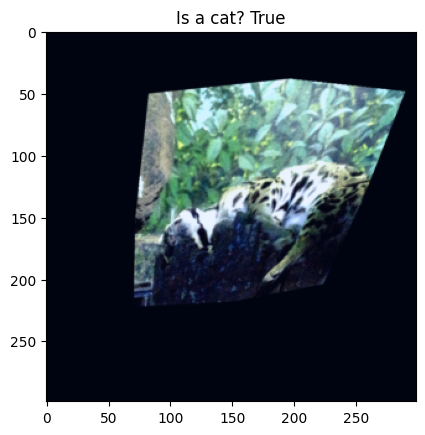

In [26]:
x, l = pt_trn_dataset[991]

print("Augmented image shape", x.shape)
im = (x.permute(1, 2, 0) - x.min()) / (x.max() - x.min())

plt.imshow(im)
plt.title(f"Is a cat? {l > 0.5}")
plt.show()

## Train the InceptionV3 model using data augmentation

In [27]:
from torchvision.models import inception_v3
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# The classifier model
model = inception_v3(weights=None, progress=True, num_classes=1)

# The Error/Loss function
criterion = nn.BCEWithLogitsLoss()

# The optimizer algorithm
optimizer = optim.Adam(model.parameters(), lr=0.001)

# The batches data loader
trn_queue = DataLoader(pt_trn_dataset, batch_size=16, shuffle=True, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [28]:
# Move the model to the GPU memory
model.train()

if torch.cuda.is_available():
  model.cuda()


for e in range(5):
  for i, (x, y) in enumerate(trn_queue):
    # Empty the accumulated gradients from any previous iteration
    optimizer.zero_grad()

    # Move the input images and their respective classes to the GPU
    if torch.cuda.is_available():
      x = x.cuda()
      y = y.cuda()

    y_hat = model(x)

    # Compute the error/loss function
    loss = criterion(y_hat.logits, y.view(-1, 1))

    # Perform the backward pass to generate the gradients of the loss function with respect to the inputs
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Log the progress of the model
    if i % 10 == 0:
      acc = torch.sum(y == y_hat.logits.detach().argmax(dim=1)) / x.shape[0]

      print(f"Epoch {e}, step {i}: loss={loss.item()}, acc={acc}")

Epoch 0, step 0: loss=1.0272812843322754, acc=0.3125
Epoch 0, step 10: loss=2.1059885025024414, acc=0.3125
Epoch 0, step 20: loss=0.5305349826812744, acc=0.5625
Epoch 0, step 30: loss=1.326841115951538, acc=0.4375
Epoch 0, step 40: loss=0.6047648191452026, acc=0.3125
Epoch 0, step 50: loss=1.4835057258605957, acc=0.5
Epoch 0, step 60: loss=2.2943146228790283, acc=0.5625
Epoch 1, step 0: loss=0.7481896281242371, acc=0.5625
Epoch 1, step 10: loss=0.7596943974494934, acc=0.5
Epoch 1, step 20: loss=0.6789357662200928, acc=0.625
Epoch 1, step 30: loss=0.8412061929702759, acc=0.4375
Epoch 1, step 40: loss=0.6454485654830933, acc=0.3125
Epoch 1, step 50: loss=1.5052578449249268, acc=0.5625
Epoch 1, step 60: loss=0.6672831773757935, acc=0.375
Epoch 2, step 0: loss=0.7042603492736816, acc=0.5625
Epoch 2, step 10: loss=1.188876986503601, acc=0.375
Epoch 2, step 20: loss=0.6845757961273193, acc=0.5
Epoch 2, step 30: loss=0.6902133226394653, acc=0.375
Epoch 2, step 40: loss=1.3393679857254028, acc

In [29]:
torch.save(model.state_dict(), "my_model_checkpoint.pth")

## Evaluate the performance of the model

To evaluate the performance of the model we'll use a set of images that have not been *seen* by our model during training.
This ensures that the performance metrics are an approximation of how our model will behave in production.

Because we are not training our model anymore, we can pass the validation images as they are without any augmentation.

In [30]:
val_pipeline = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [31]:
pt_val_dataset = FiftyOneTorchDataset(val_dataset, classes=["Cat"], transforms=val_pipeline)

val_queue = DataLoader(pt_trn_dataset, batch_size=16, shuffle=False)

In [32]:
model.eval()

tp = 0
tn = 0
p = 0
n = 0

with torch.no_grad():
  for i, (x, y) in enumerate(val_queue):

    # Move the input images and their respective classes to the GPU
    if torch.cuda.is_available():
      x = x.cuda()
      y = y.cuda()

    y_hat = model(x)

    p += y.sum().item()
    n += x.shape[0] - y.sum().item()
    tp += torch.sum(y * y_hat.detach().argmax(dim=1)).item()
    tn += torch.sum((1-y) * (1-y_hat.detach().argmax(dim=1))).item()

    # Log the progress of the model
    if i % 10 == 0:
      acc = (tp + tn) / (p + n)
      print(f"Step {i}/{len(val_queue)}: acc={acc}")

Step 0/63: acc=0.9375
Step 10/63: acc=0.7840909090909091
Step 20/63: acc=0.6696428571428571
Step 30/63: acc=0.5766129032258065
Step 40/63: acc=0.5259146341463414
Step 50/63: acc=0.47794117647058826
Step 60/63: acc=0.4456967213114754


Save our model to use in production and share